# Central Limit Theorem

The Central Limit Theorem (CLT) is one of those fundamental concepts in statistics that appears everywhere. Once I understood what it really tells us, it was easy to see why more data is king. Here I demonstrate the CLT through some simple numpy code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The CLT states that, regardless of the actual probability distribution of a dataset with a known variance $\sigma^2$, the distribution of sample means from the population converges to a normal distribution with the same mean and variance $\sigma^2/n$ as the sample size $n$ increases.

Let's unpack that with some code. First, we take a fairly large dataset from a uniform distribution. This is our population.

In [2]:
d = np.random.uniform(0, 1, 1000000)

As expected, the distribution of the data resembles a rectangle.

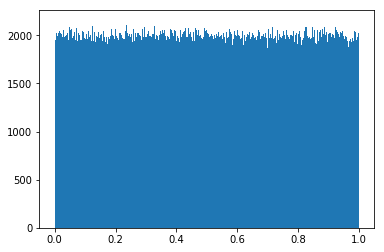

In [3]:
h = plt.hist(d, 500)

Let's have a look at the stats of our population.

In [4]:
print 'Mean : ', np.mean(d)
print 'Variance : ', np.var(d)
print 'Standard Deviation : ', np.std(d)

Mean :  0.4997070336867518
Variance :  0.08341841993289137
Standard Deviation :  0.28882247130874594


We will try to estimate these parameters for our population data using a normal distribution. The CLT tells us the following:
- Fix a sample size
- Draw multiple samples of the same size from the population and compute their mean
- compute the mean and variance of the sample mean distribution
- repeat for increasing sample sizes
- what we should notice is the mean of the sample distribution staying close to the population mean and variance decreasing with increasing sample sizes

So let's define our sample sizes. Here I have chosen a few sample sizes for better visual demonstration of the results.

In [5]:
sample_sizes = [1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 50, 999000]

For each of the above sample sizes, we will draw 100,000 samples from the population, compute the mean of each sample and store them for visualisation.

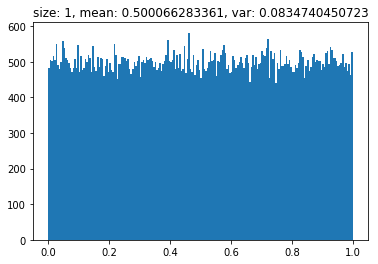

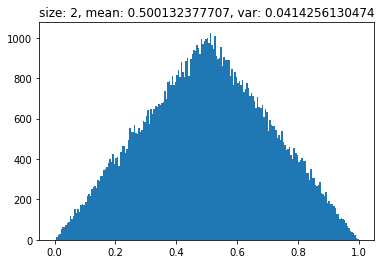

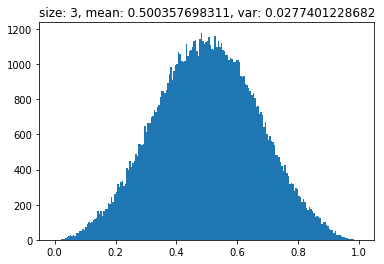

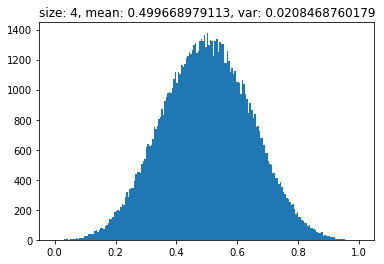

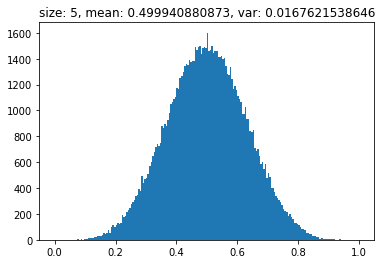

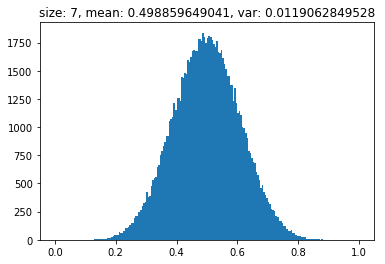

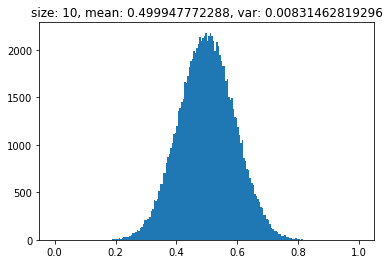

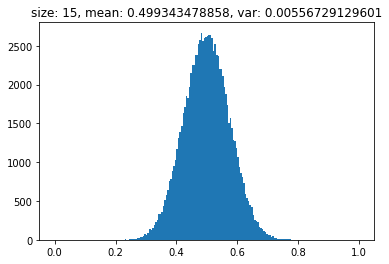

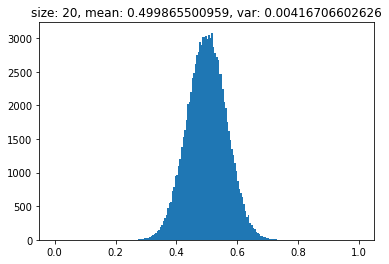

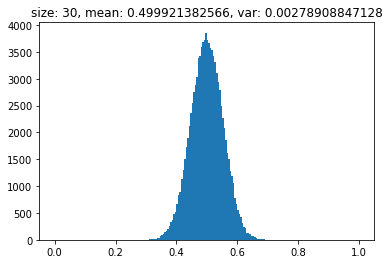

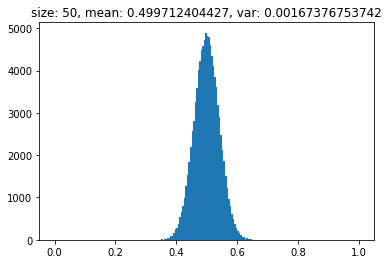

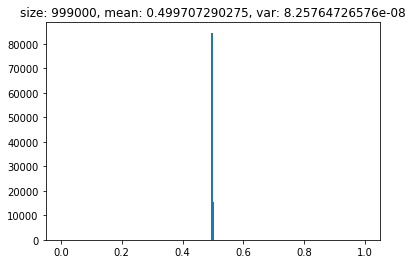

In [6]:
# lists to store the computed means for each sample size
means = []
variances = []
stds = []

# iterate over each sample size
for s in sample_sizes:
    # draw 100000 random samples of fixed size from the population and store their means
    samples = [np.mean(np.random.choice(d, s)) for _ in range(100000)]
    
    # store the mean and variance of the sample distribution
    means.append(np.mean(samples))
    variances.append(np.var(samples))
    stds.append(np.std(samples))
    
    # plot the sample distribution
    fig = plt.figure(figsize=(6,4))
    # plot the histogram while keeping the bin range constant to show how the variance decreases
    h = plt.hist(samples, bins=200, range=(0,1))
    plt.title('size: {}, mean: {}, var: {}'.format(s, np.mean(samples), np.var(samples)))

## What are we observing here?

The distributions becoming increasingly narrow. Starting off as quite spread out with the small sample sizes, the variance in the computed sample means become less as the sample size increases, all the while the sample mean being close to the population mean. We see the sample distribution resembling a normal distribution quite quickly. As we get close to the population size, the estimated distribution is almost as good as the point estimate of the mean. Notice the number of observed sample means near the population mean keep going higher with increasing sample size.

For me this means that the more data we gather from a given population, i.e. larger our sample size, greater is the confidence in the computed mean. For any process that we are trying to estimate, **DATA is KING!!!**

Let's have a look at how the CLT's prediction fares in terms of decreasing variance with increasing sample size. First we plot the mean, variance and std for the different sample sizes (except for the largest one, for visual clarity, as the variance for that is too low and skews the graph)

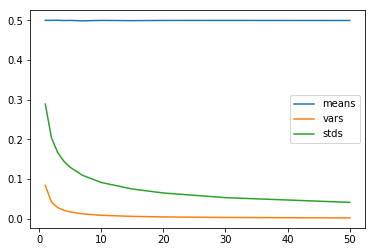

In [7]:
plt.plot(sample_sizes[:-1], means[:-1], label='means')
plt.plot(sample_sizes[:-1], variances[:-1], label='vars')
plt.plot(sample_sizes[:-1], stds[:-1], label='stds')
plt.legend()
plt.show()

Now let's have a look at the computed variances and the CLT variances predicted by $\sigma^2/n$

In [8]:
predicted_vars = [np.var(d)/_ for _ in sample_sizes]

import pandas as pd
pd.DataFrame(np.stack([predicted_vars, variances], axis=1), columns=['predicted', 'computed'])

,predicted,computed
0,8.341842e-02,8.347405e-02
1,4.170921e-02,4.142561e-02
2,2.780614e-02,2.774012e-02
3,2.085460e-02,2.084688e-02
4,1.668368e-02,1.676215e-02
5,1.191692e-02,1.190628e-02
6,8.341842e-03,8.314628e-03
7,5.561228e-03,5.567291e-03
8,4.170921e-03,4.167066e-03
9,2.780614e-03,2.789088e-03


We can see that the prediction from CLT is quite accurate in matching the computed variance of different sample sizes.

This means that given a population, we can find the required sample size for a reliable estimate of the mean within a required variance bound.